# 0.0 Imports

In [2]:
import warnings

import pandas as pd
import numpy  as np 
import os
from matplotlib       import pyplot  as plt
from sklearn          import metrics as mt
from sklearn.ensemble import RandomForestClassifier

In [3]:
warnings.filterwarnings("ignore")

# 1.0 Load Dataset

In [4]:
# executando o arquivo Metrics_functions
get_ipython().run_line_magic('run', 'Metrics_functions.ipynb')

In [5]:
# carregando os dados
x_train, y_train, x_val, y_val, x_test, y_test = load_data('classificacao')

# 2.0 Training Model

In [6]:
# treinamento
R_forest = RandomForestClassifier()
R_forest.fit(x_train, y_train)

# classificação
y_pred = R_forest.predict(x_train)

# metricas de permormance
metrics(y_train, y_pred, 'Treinamento')

# guardando resultado
acc_train, precision_train, recall_train, f1_score_train = save_metrics(y_train, y_pred)

Metricas de Treinamento: 
Accuracy:  1.0
Precision: 1.0
Recall:    1.0
F1 Score:  1.0


## 2.1 Performance on Validation Data

In [7]:
#treinamento
R_forest = RandomForestClassifier()
R_forest.fit(x_train, y_train)

# classificacao
y_pred_val = R_forest.predict(x_val)

#performance
metrics(y_val, y_pred_val, 'Validação')

#guardando resultados
acc_val, precision_val, recall_val, f1_score_val = save_metrics(y_val, y_pred_val)

Metricas de Validação: 
Accuracy:  0.965
Precision: 0.974
Recall:    0.943
F1 Score:  0.959


## 2.1 Finding The Best Parameter

### Parameter
* N_estimators
* Max_depth

In [8]:
values = np.arange(10, 200, 10)

accuracy_list  = []
precision_list = []
recall_list    = []
f1_score_list  = []

In [9]:
for i in values:
    #treinamento
    R_forest = RandomForestClassifier(n_estimators = i)
    R_forest.fit(x_train, y_train)

    #classificacao
    y_pred_val = R_forest.predict(x_val)

    #performance
    a, p, r, f = save_metrics(y_val, y_pred_val)

    # guardar resultados
    accuracy_list.append(a)
    precision_list.append(p)
    recall_list.append(r)
    f1_score_list.append(f)

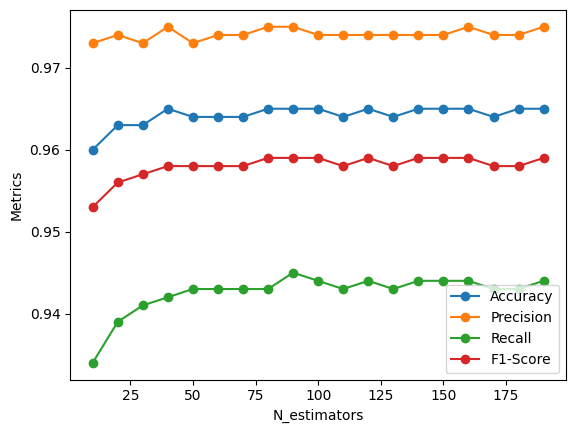

In [10]:
plt.plot(values, accuracy_list, marker = 'o', label = 'Accuracy')
plt.plot(values, precision_list, marker = 'o', label = 'Precision')
plt.plot(values, recall_list, marker = 'o', label = 'Recall')
plt.plot(values, f1_score_list, marker = 'o', label = 'F1-Score')
plt.xlabel('N_estimators')
plt.ylabel('Metrics')
plt.legend()

In [11]:
best_estimators = values[np.argmax(accuracy_list)]
best_estimators

40

In [12]:
max_depth = np.arange(1, 51, 1)

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

In [13]:
for i in max_depth: 
    # treinamento
    R_forest = RandomForestClassifier(max_depth = i)
    R_forest.fit(x_train, y_train)

    # classificacao
    y_pred_val = R_forest.predict(x_val)

    #performance 
    a, p, r, f = save_metrics(y_val, y_pred_val)

    # guardar resultados
    accuracy_list.append(a)
    precision_list.append(p)
    recall_list.append(r)
    f1_score_list.append(f)

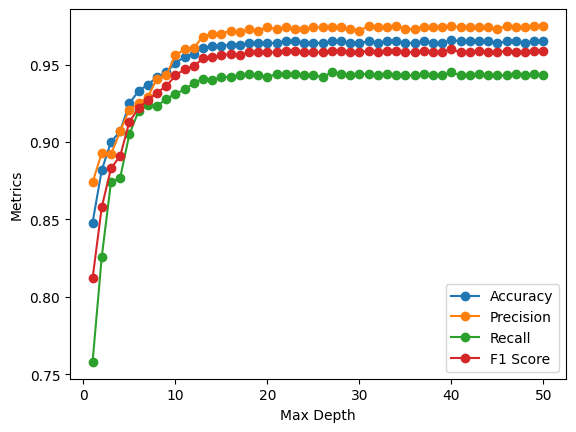

In [14]:
plt.plot(max_depth, accuracy_list, marker="o", label="Accuracy")
plt.plot(max_depth, precision_list, marker="o", label="Precision")
plt.plot(max_depth, recall_list, marker="o", label="Recall")
plt.plot(max_depth, f1_score_list, marker="o", label="F1 Score")
plt.xlabel("Max Depth")
plt.ylabel("Metrics")
plt.legend()

In [15]:
best_max_depth = np.argmax(accuracy_list)
best_max_depth

39

## 2.2 Performance on Test Data

In [17]:
# treinamento
R_forest = RandomForestClassifier(n_estimators = best_estimators, max_depth = best_max_depth)
R_forest.fit(np.concatenate((x_train, x_val)),
             np.concatenate((y_train, y_val)))

# classificação
y_pred_test = R_forest.predict(x_test)

# performance
metrics(y_test, y_pred_test,'Teste')

#guardando metricas
acc_test, precision_test, recall_test, f1_score_test = save_metrics(y_test,y_pred_test)

Metricas de Teste: 
Accuracy:  0.964
Precision: 0.974
Recall:    0.944
F1 Score:  0.959


# 3.0 Save Results

In [18]:
train_metrics = {
    'Algoritmo': 'Randon_Forest',
    'Accuracy' : acc_train,
    'Precision': precision_train,
    'Recall'   : recall_train,
    'F1-Score' : f1_score_train
}
validation_metrics = {
    'Algoritmo': 'Randon_Forest',
    'Accuracy' : acc_val,
    'Precision': precision_val,
    'Recall'   : recall_val,
    'F1-Score' : f1_score_val
}
test_metrics = {
    'Algoritmo': 'Randon_Forest',
    'Accuracy' : acc_test,
    'Precision': precision_test,
    'Recall'   : recall_test,
    'F1-Score' : f1_score_test
}

train = pd.DataFrame([train_metrics])
validation = pd.DataFrame([validation_metrics])
test = pd.DataFrame([test_metrics])

train.to_csv(
    './train_metrics_classificacao.csv',
    mode ='a',
    index=False,
    header=not os.path.exists('./train_metrics_classificacao.csv')
)

validation.to_csv(
    './validation_metrics_classificacao.csv',
    mode ='a',
    index=False,
    header=not os.path.exists('./validation_metrics_classificacao.csv')
)

test.to_csv(
    './test_metrics_classificacao.csv',
    mode ='a',
    index=False,
    header=not os.path.exists('./test_metrics_classificacao.csv')
)